<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_4/4_1_matplotlib_pyplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with Matplotlib & Pyplot

Let's step into the world of data visualization with Matplotlib. This tutorial will guide you in creating plots, using Matplotlib's pyplot submodule. Get ready to elevate your plotting game with two of the most sought-after plotting packages in Python.

Here we are going to perform the following:

- Import packages 
- Import datasets:
  - AMC.csv
  - NC_OPIOID_ANALYSIS.csv
  - seattle_crime_2022.csv

- Matplotlib plotting: 
  1. hist
  2. boxplot
  3. bar
  4. scatter 
  5. plot (line) 


  

In [2]:
# -- import packages -- 
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 

# -- this tells jupyter to display the graphs in the notebook -- 
%matplotlib inline

In [4]:
# --- import AMC -- 
AMC = pd.read_csv("/content/AMC.csv")
AMC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,2.20,2.20,2.00,2.01,2.01,29873800
1,2021-01-05,1.99,2.03,1.91,1.98,1.98,28148300
2,2021-01-06,2.03,2.23,1.97,2.01,2.01,67363300
3,2021-01-07,2.08,2.11,2.02,2.05,2.05,26150500
4,2021-01-08,2.09,2.21,2.07,2.14,2.14,39553300


In [3]:
# -- import airbnb data -- 
opioid = pd.read_csv("/content/NC_OPIOID_ANALYSIS.csv")
opioid.head()

,NPI,Credentials,Gender,Entity_Type,Street_Address_1,Street_Address_2,State_Code,Provider_Type,Num_of_Services,Num_of_Medicare_Beneficiaries,...,HYDROCODONE_script_count,tramadol_script_count,Percocet_script_count,oxycodone_script_count,fentanyl_script_count,levothyroxine_script_count,potassium_script_count,metformin_script_count,diltiazem_script_count,gabapentin_script_count
0,1003007964,PA-C,F,I,3101 LATROBE DR,NaN,NC,Physician Assistant,103.0,82,...,34,0,0,0,0,0,0,0,0,0
1,1003011578,M.D.,F,I,415 N CENTER ST,SUITE 300,NC,Gastroenterology,1281.0,530,...,0,0,0,0,0,0,0,0,0,0
2,1003013756,D.O.,M,I,2651 MORGANTON BLVD SW,NaN,NC,Family Practice,1476.0,474,...,40,32,15,0,0,81,0,173,0,60
3,1003026550,PA-C,M,I,301 YADKIN ST,NaN,NC,Physician Assistant,1176.0,256,...,123,11,309,633,33,0,0,0,0,23
4,1003031691,M.D.,M,I,2800 BLUE RIDGE RD STE 201,NaN,NC,Internal Medicine,1741.0,559,...,0,0,0,0,0,0,0,0,0,0


In [5]:
crime = pd.read_csv("/content/seattle_crime_2022.csv")
crime.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,X_100_block_address,longitude,latitude
0,2020-044620,12605873663,2020-02-05T15:10:00Z,NaN,2020-02-05T16:24:31Z,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03T13:00:00Z,2020-02-04T13:00:00Z,2020-02-05T15:06:28Z,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-03T01:30:00Z,2020-02-03T02:30:00Z,2020-02-05T14:39:33Z,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05T06:17:00Z,2020-02-05T07:21:00Z,2020-02-05T08:30:55Z,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,2020-02-05T05:51:21Z,NaN,2020-02-05T05:51:31Z,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


## Updated Stockmarket Data

For folks those looking to download stockmarket data try this:

```python
# !pip install yfinance # if you don't have it already
import yfinance as yf
AMC = yf.download('AMC', 
                      start='2021-01-01', 
                      end='2021-06-30', 
                      progress=False)

AMC = AMC.reset_index() # -- comes back as a timeseries object, reset the index so we can plot by date. 
AMC.head()

AMC.to_csv('/content/AMC.csv', index=False)
```

In [7]:
#!pip install yfinance # if you don't have it already
import yfinance as yf
AMC = yf.download('AMC', 
                      start='2021-01-01', 
                      end='2023-01-30', 
                      progress=False)

AMC = AMC.reset_index() # -- comes back as a timeseries object, reset the index so we can plot by date. 
AMC.head()

#AMC.to_csv('/content/AMC.csv', index=False)
AMC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04 00:00:00-05:00,2.20,2.20,2.00,2.01,2.01,29873800
1,2021-01-05 00:00:00-05:00,1.99,2.03,1.91,1.98,1.98,28148300
2,2021-01-06 00:00:00-05:00,2.03,2.23,1.97,2.01,2.01,67363300
3,2021-01-07 00:00:00-05:00,2.08,2.11,2.02,2.05,2.05,26150500
4,2021-01-08 00:00:00-05:00,2.09,2.21,2.07,2.14,2.14,39553300


# Clean Up Column Names!

This should always be a first step in your process! Clean up your Pandas column names simply to make your life easier. Strip whitespaces, replace special characters, use descriptive names, handle duplicates, and ensure uniqueness.

lets clean up:
- AMC
- opiod
- crime

In [8]:
# -- clean up column names 
opioid.columns = ( opioid.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)

print(opioid.columns)

crime.columns = ( crime.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)

print(crime.columns)

# -- clean up column names 
AMC.columns = ( AMC.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print()
print(AMC.columns)

Index(['npi', 'credentials', 'gender', 'entity_type', 'street_address_1',
       'street_address_2', 'state_code', 'provider_type', 'num_of_services',
       'num_of_medicare_beneficiaries', 'total_medicare_payment_amt',
       'average_age_of_beneficiaries', 'medical_school_name',
       'graduation_year', 'primary_specialty', 'organization_legal_name',
       'city_name', 'population_est', 'people_sq_mile', 'years_in_practice',
       'full_name', 'hydrocodone_day_count', 'tramadol_day_count',
       'percocet_day_count', 'oxycodone_day_count', 'fentanyl_day_count',
       'levothyroxine_day_count', 'potassium_day_count', 'metformin_day_count',
       'diltiazem_day_count', 'gabapentin_day_count',
       'hydrocodone_script_count', 'tramadol_script_count',
       'percocet_script_count', 'oxycodone_script_count',
       'fentanyl_script_count', 'levothyroxine_script_count',
       'potassium_script_count', 'metformin_script_count',
       'diltiazem_script_count', 'gabapentin_script_

<ipython-input-8-c536febf6ad7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  opioid.columns = ( opioid.columns
<ipython-input-8-c536febf6ad7>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crime.columns = ( crime.columns
<ipython-input-8-c536febf6ad7>:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  AMC.columns = ( AMC.columns


In [9]:
# -- count nulls by column -- 
opioid.isnull().sum(axis = 0)

npi                                 0
credentials                       286
gender                              0
entity_type                         0
street_address_1                    0
street_address_2                 8550
state_code                          0
provider_type                       0
num_of_services                     0
num_of_medicare_beneficiaries       0
total_medicare_payment_amt          0
average_age_of_beneficiaries        0
medical_school_name                 0
graduation_year                    49
primary_specialty                   0
organization_legal_name          1260
city_name                           0
population_est                      0
people_sq_mile                      0
years_in_practice                  49
full_name                           0
hydrocodone_day_count               0
tramadol_day_count                  0
percocet_day_count                  0
oxycodone_day_count                 0
fentanyl_day_count                  0
levothyroxin

# 1. Histogram's 

## pyplot.hist(x, bins)

Matplotlib.pyplot `.hist()` is a histogram plot that represents the frequency distribution of a set of continuous or discrete data. It each bar represents the number of occurrences(frequency). In Python, you can create a histogram plot using the hist function from the pyplot submodule of Matplotlib. Here's the template code:

```python
import matplotlib.pyplot as plt

plt.hist(df["column"], bins=30)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.title('Matplotlib hist plot example')
plt.show()

```
You need the following info:

1. a numeric variable 
2. a number of bins to slice the data into 



---
 
**Facecolor** controls the color of the bars:

- Named colors: 'red', 'blue', 'green', etc.
- RGB Tuples: (0.1, 0.2, 0.5)
- RGBA Tuples: (0.1, 0.2, 0.5, 0.8) for transparency
- HEX codes: '#FF5733'


**Alpha** is a value that specifies the transparency of an object in Matplotlib. It ranges from 0 to 1, where 0 is fully transparent and 1 is fully opaque. By specifying an alpha value for the facecolor argument, you can control the transparency of the plotted elements in a graph, allowing the underlying data or other elements to show through. This can be useful for visualizing overlapping data points


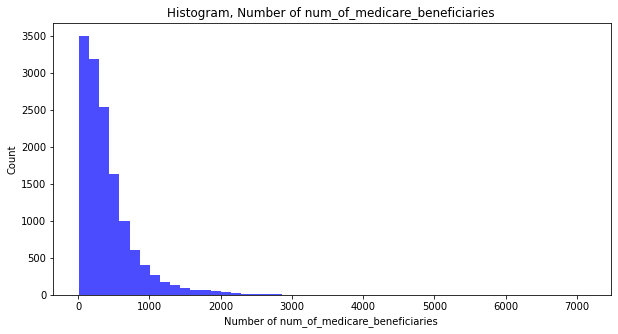

In [13]:
# -- change figure size, figsize= (Width, Height) --
plt.figure(figsize=(10,5))

# -- simply change the bin size to make the chart look better --
plt.hist(opioid['num_of_medicare_beneficiaries'], 
         bins=50,                                 # change to 20, 50, 100, 250
         facecolor='blue',                        # change red, blue, green
         alpha=0.7)                               # change from 0.25, 0.5, 0.75 
plt.title('Histogram, Number of num_of_medicare_beneficiaries ')
plt.ylabel('Count')
plt.xlabel('Number of num_of_medicare_beneficiaries ')
plt.show()

## Make a Histogram : 

1. create a histogram of opioids oxycodone_day_count column 
2. create a histogram of AMC's closing price 




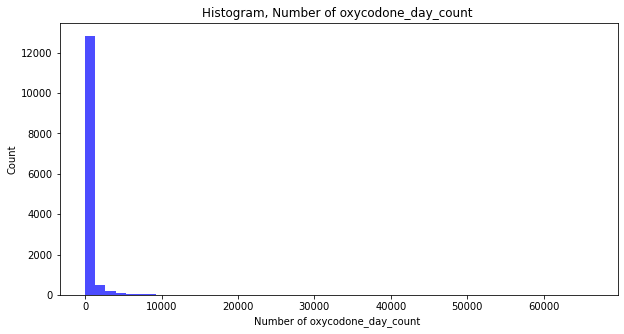

In [14]:
# -- put your code here -- 


# 2. Boxplot 

## plt.boxplot() 

A box plot, also known as a box-and-whisker plot, is a type of graph used in statistics to represent the distribution of a dataset. It displays the summary of the set of values, including the minimum, first quartile, median, third quartile, and maximum, in the form of a box, and also shows any outliers or unusual values. In a box plot, the box represents the range between the first and third quartiles, and the line inside the box represents the median. The whiskers represent the minimum and maximum values, excluding outliers.

A box plot is useful for quickly identifying skewness, outliers, and other features of the distribution of a dataset. In Matplotlib, you can create a box plot using the boxplot function from the pyplot submodule.


```python
import matplotlib.pyplot as plt

plt.boxplot(df["column"])
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Matplotlib boxplot plot example')
plt.show()

```

Let's make a boxplot of num_of_medicare_beneficiaries

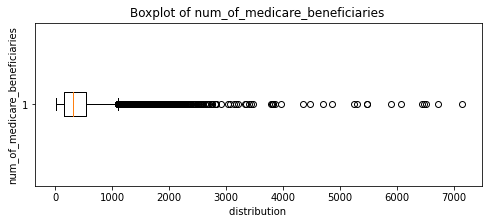

In [20]:
# -- change figure size, figsize= (Width, Height) --
plt.figure(figsize=(8,3))

# -- boxplot --
plt.boxplot(opioid['num_of_medicare_beneficiaries'], vert=False) # change to True
plt.title('Boxplot of num_of_medicare_beneficiaries ')
plt.ylabel('num_of_medicare_beneficiaries')
plt.xlabel('distribution ')
plt.show()

## Two Step Processing

Suppose I need to filter the "num_of_medicare_beneficiaries" where credentials == PA-C? How do you do this? The way I like to do this is to use a query() to filter the rows of data then plot the result like this: 

```python
# Filter data for PA-C
filtered_data = data.query("credentials == 'PA-C'")

# Create box plot
plt.boxplot(filtered_data['num_of_medicare_beneficiaries'])
```

Of course you can do this all in one step but it gets messy! 

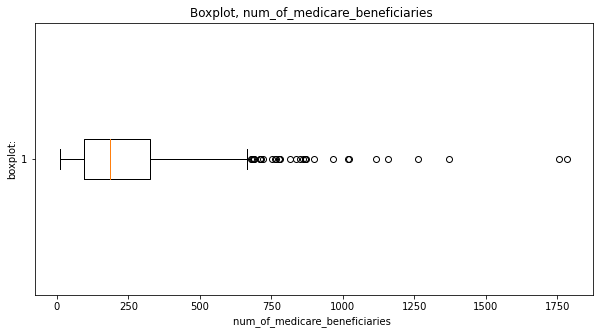

In [29]:
# -- filter first -- 
res1 = (opioid
        .query('credentials == "PA-C" '))

# -- then plot -- 
plt.figure(figsize=(10,5))
plt.boxplot(res1['num_of_medicare_beneficiaries'],  vert=False)
plt.title('Boxplot, num_of_medicare_beneficiaries ')
plt.ylabel('boxplot:')
plt.xlabel('num_of_medicare_beneficiaries ')
plt.show()

Now you try 

1. create a box plot of AMC's volume 
2. create a box plot of Opioid's **average_age_of_beneficiaries**, where credential == "PA-C" 
3. create a box plot of Opioid's **percocet_day_count**, where credential == "MD" 




In [ ]:
# -- insert code here -- 

In [ ]:
# -- insert code here -- 

In [ ]:
# -- insert code here -- 

# 3. Bar charts

## plt.bar()

A bar chart is a visually appealing representation of categorical data that effectively showcases the relationship between the categories (X-axis) and their corresponding numeric values (Y-axis). The chart presents the data as bars, with the height of each bar determined by the numeric value, allowing for an easy comparison of the values within each category. With the use of colors and labels, a bar chart can effectively communicate complex data patterns and trends, making it a useful tool in data analysis and presentation.

## Simple recipe for Bar charts:

1. summarize the data ( count, mean, median etc. ) first, **creating a new data frame (result set)**
2. sort by the bars 
3. then plot the data using plt.bar(x, y) 

you if you use groupby you'll need to **de-multi-index** the grouping variables using reset_index() if you want to make your life easier.



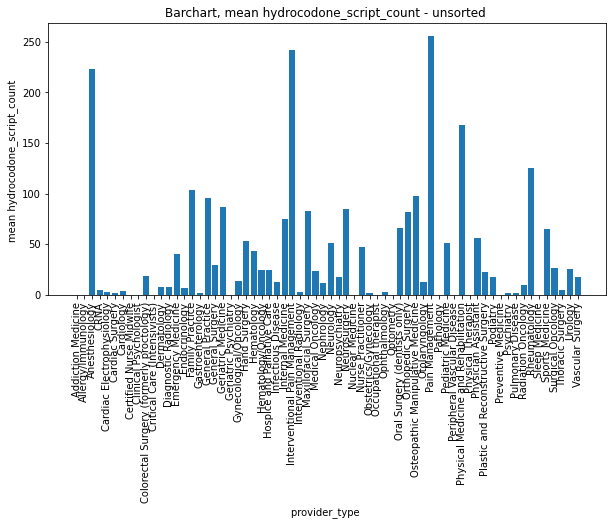

In [47]:
# -- first summarize -- 
res = (opioid
        .groupby('provider_type')[['hydrocodone_script_count']]
        .agg('mean') # -- summarize the data 
        .reset_index()                          # -- turn groupby index into a variable 
        .rename(columns={'hydrocodone_script_count':'mean hydrocodone_script_count'}) # -- rename column to something useful.  
  )

# -- then plot -- 
plt.figure(figsize=(10,5))
# -- bar plot --
plt.bar(res['provider_type'], res['mean hydrocodone_script_count'])
plt.title('Barchart, mean hydrocodone_script_count - unsorted ')
plt.ylabel('mean hydrocodone_script_count ')
plt.xlabel('provider_type ')
plt.xticks(rotation=90)
plt.show()


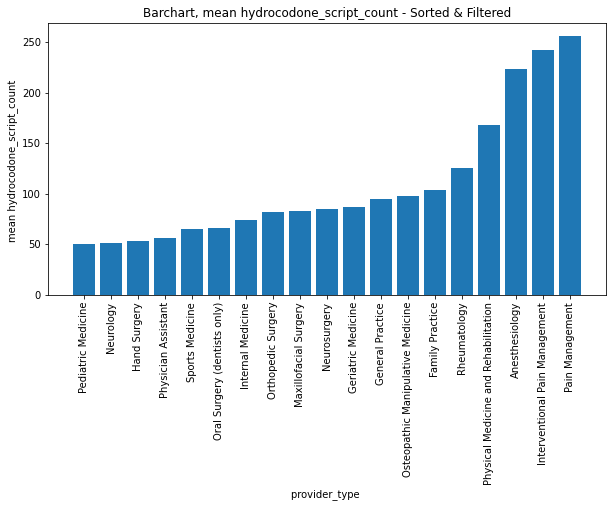

In [36]:
# -- first summarize -- 
res = (opioid
        .groupby('provider_type')[['hydrocodone_script_count']]
        .agg('mean') # -- summarize the data 
        .reset_index()                          # -- turn groupby index into a variable 
        .rename(columns={'hydrocodone_script_count':'mean hydrocodone_script_count'}) # -- rename column to something useful.  
        .sort_values('mean hydrocodone_script_count')  # -- sorted
        .query("`mean hydrocodone_script_count` > 50") # -- filtered notice the back-tic
  )

# -- then plot -- 
plt.figure(figsize=(10,5))
# -- bar plot --
plt.bar(res['provider_type'], res['mean hydrocodone_script_count'])
plt.title('Barchart, mean hydrocodone_script_count - Sorted & Filtered')
plt.ylabel('mean hydrocodone_script_count ')
plt.xlabel('provider_type ')
plt.xticks(rotation=90)
plt.show()

## Now you try:

1. create a bar chart of opioids using the the mean of fentanyl_script_count  by gender. 

2. create a bar chart of the count of crimes in seattle by precinct 

In [ ]:
# -- insert code -- 

In [ ]:
# -- insert code -- 

# 4. Scatter plots 

## plt.scatter()

Scatterplots are primarily used to display relationships between two numeric variables, where each data point represents the values of the two variables. By plotting the data points, scatterplots can provide insights into the distribution and distribution patterns of the data, as well as the relationship between the two variables, such as correlation and outliers.

```python
plt.scatter(df["col1"],df["col2"])
```




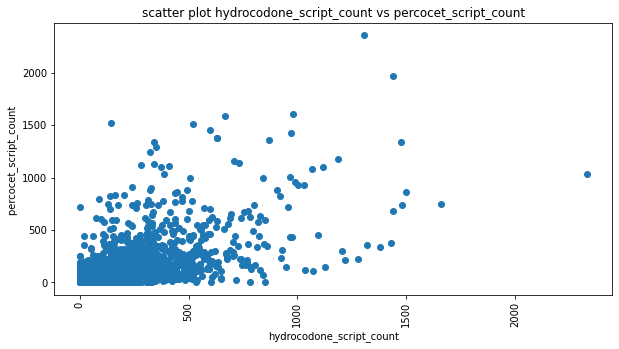

In [38]:
# -- then plot -- 
plt.figure(figsize=(10,5))
# -- scatter plot --
plt.scatter(opioid['hydrocodone_script_count'], opioid["percocet_script_count"])
plt.title('scatter plot hydrocodone_script_count vs percocet_script_count')
plt.ylabel('percocet_script_count ')
plt.xlabel('hydrocodone_script_count')
plt.xticks(rotation=90)
plt.show()


## Now you try:
1. create a scatter plot of AMC's volume by closing price 

2. create a scatter plot of opioid's num_of_medicare_beneficiaries by total_medicare_payment_amt  

3. create a scatter plot of opioid's average_age_of_beneficiaries  by    hydrocodone_day_count

In [ ]:
# -- insert code here -- 

In [ ]:
# -- insert code here -- 

In [ ]:
# -- insert code here -- 

# 5. Line Plot 

## plt.plot()

A line plot is typically used to plot a single variable over time, such as stock prices, temperature, or sales data. In this case, the x-axis represents the time dimension, and the y-axis represents the variable being plotted. Line plots are useful for visualizing trends over time and identifying patterns in the data.

However, line plots can also be used to compare categories by plotting multiple lines, each representing a different category, on the same graph. For example, you could use a line plot to compare the closing prices of multiple stocks over time, or to compare the sales of multiple products over time. By comparing the lines, you can easily identify patterns and relationships between the categories, making line plots a useful tool in data analysis and presentation.

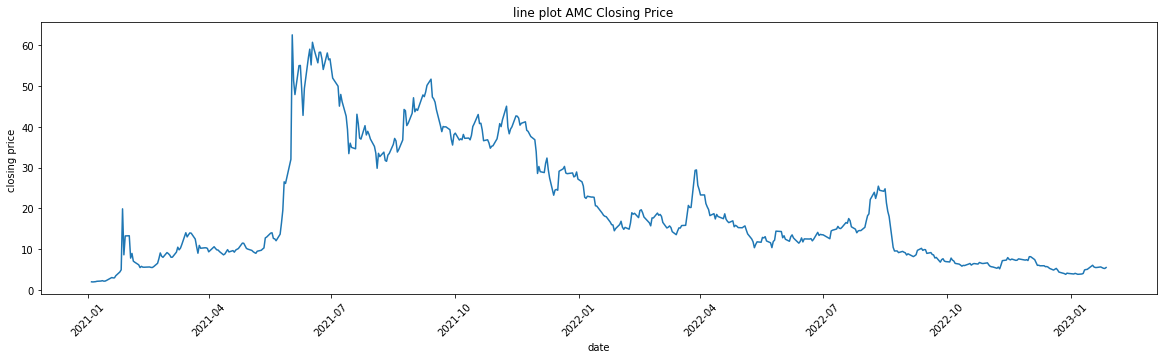

In [44]:

plt.figure(figsize=(20,5))
# -- scatter plot --
plt.plot(AMC['date'], AMC['close'])
plt.title('line plot AMC Closing Price   ')
plt.ylabel('closing price ')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

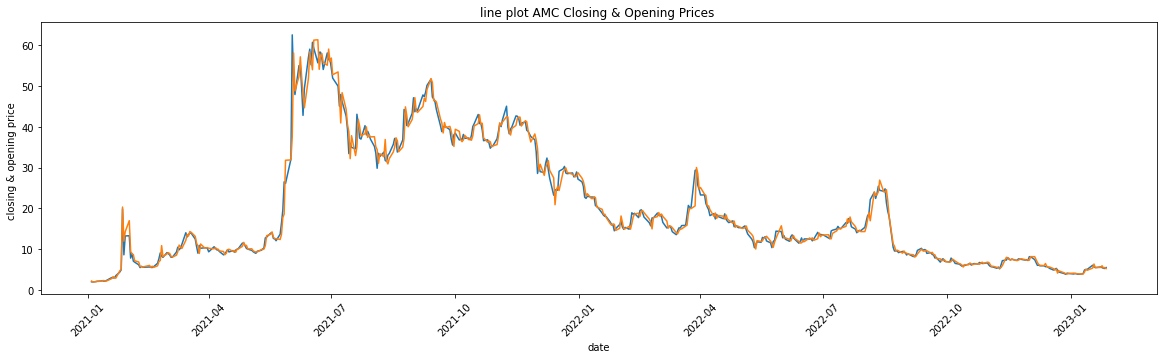

In [45]:

plt.figure(figsize=(20,5))
# -- scatter plot --
plt.plot(AMC['date'], AMC['close'])
plt.plot(AMC['date'], AMC['open'])
plt.title('line plot AMC Closing & Opening Prices ')
plt.ylabel('closing & opening price ')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

Now you try, 
1. plot AMC's volume by date. 
2. plot AMC closing price for 2022. 
3. plot AMC closing price vs opening price for 2022.

what would make a better plot line or bar? 
